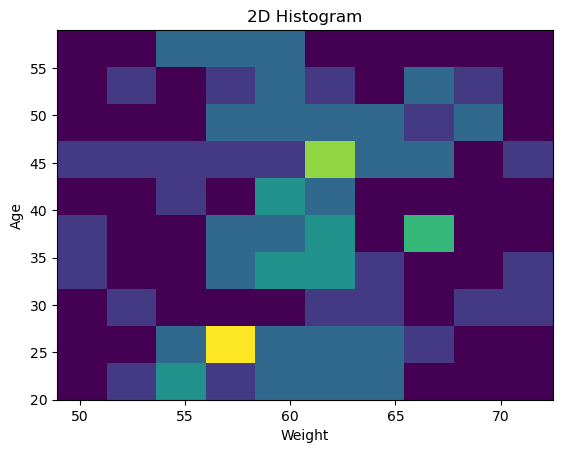

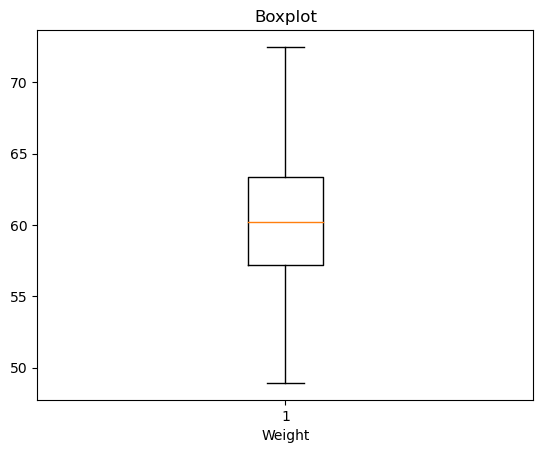

In [7]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd

def draw_histogram():
    selected_x = x_var.get()
    selected_y = y_var.get()
    
    if selected_x and selected_y:
        x_data = data[selected_x]
        y_data = data[selected_y]
        
        plt.figure()
        plt.hist2d(x_data, y_data, bins=10, cmap='viridis')
        plt.xlabel(selected_x)
        plt.ylabel(selected_y)
        plt.title('2D Histogram')
        
        # Clear previous plot if exists
        for widget in plot_frame.winfo_children():
            widget.destroy()
        
        # Create a Tkinter canvas widget to embed matplotlib figure
        canvas = FigureCanvasTkAgg(plt.gcf(), master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
    else:
        # If either x or y is not selected, show a warning
        messagebox.showwarning("Warning", "Please select both X and Y variables")

def draw_boxplot():
    selected_variable = variable_var.get()
    
    if selected_variable:
        variable_data = data[selected_variable]
        
        plt.figure()
        plt.boxplot(variable_data)
        plt.xlabel(selected_variable)
        plt.title('Boxplot')
        
        # Clear previous plot if exists
        for widget in plot_frame.winfo_children():
            widget.destroy()
        
        # Create a Tkinter canvas widget to embed matplotlib figure
        canvas = FigureCanvasTkAgg(plt.gcf(), master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
    else:
        # If variable is not selected, show a warning
        messagebox.showwarning("Warning", "Please select a variable")

# Sample data
data = {
    'Height': np.random.normal(160, 10, 100),
    'Weight': np.random.normal(60, 5, 100),
    'Age': np.random.randint(20, 60, 100)
}

# Create main window
window = tk.Tk()
window.title("Data Visualization")

# Create frames for widgets
data_frame = ttk.Frame(window)
data_frame.pack(padx=10, pady=10)

plot_frame = ttk.Frame(window, borderwidth=2, relief="groove")
plot_frame.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

# Create labels and comboboxes for selecting x and y variables
x_label = ttk.Label(data_frame, text="Select X Variable:")
x_label.grid(row=0, column=0, padx=5, pady=5)

x_var = tk.StringVar()
x_combobox = ttk.Combobox(data_frame, textvariable=x_var, values=list(data.keys()))
x_combobox.grid(row=0, column=1, padx=5, pady=5)

y_label = ttk.Label(data_frame, text="Select Y Variable:")
y_label.grid(row=1, column=0, padx=5, pady=5)

y_var = tk.StringVar()
y_combobox = ttk.Combobox(data_frame, textvariable=y_var, values=list(data.keys()))
y_combobox.grid(row=1, column=1, padx=5, pady=5)

# Create a button to draw histogram
draw_button = ttk.Button(data_frame, text="Draw Histogram", command=draw_histogram)
draw_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5, sticky="ew")

# Create a label and combobox for selecting a variable for boxplot
variable_label = ttk.Label(data_frame, text="Select Variable for Boxplot:")
variable_label.grid(row=0, column=2, padx=5, pady=5)

variable_var = tk.StringVar()
variable_combobox = ttk.Combobox(data_frame, textvariable=variable_var, values=list(data.keys()))
variable_combobox.grid(row=0, column=3, padx=5, pady=5)

# Create a button to draw boxplot
draw_boxplot_button = ttk.Button(data_frame, text="Draw Boxplot", command=draw_boxplot)
draw_boxplot_button.grid(row=1, column=2, columnspan=2, padx=5, pady=5, sticky="ew")

# Create a dataframe to display dataset
data_table = ttk.Treeview(data_frame, columns=tuple(data.keys()), show="headings")
for col in data.keys():
    data_table.heading(col, text=col)
    data_table.column(col, width=100)
data_table.grid(row=3, column=0, columnspan=4, padx=5, pady=5)

# Populate dataframe with sample data
for i in range(len(data['Height'])):
    data_table.insert("", "end", values=[data['Height'][i], data['Weight'][i], data['Age'][i]])

# Start the GUI main loop
window.mainloop()


In [5]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd

# def draw_histogram():
#     selected_x = x_var.get()
#     selected_y = y_var.get()
    
#     if selected_x and selected_y:
#         x_data = data[selected_x]
#         y_data = data[selected_y]
        
#         # Convert numpy arrays to pandas Series
#         x_series = pd.Series(x_data)
#         y_series = pd.Series(y_data)
        
#         # Plot histogram using pandas plot method
#         plt.figure()
#         x_series.plot(kind='hist', bins=20, title=selected_x)
#         plt.gca().spines[['top', 'right']].set_visible(False)
        
#         # Clear previous plot if exists
#         for widget in plot_frame.winfo_children():
#             widget.destroy()
        
#         # Create a Tkinter canvas widget to embed matplotlib figure
#         canvas = FigureCanvasTkAgg(plt.gcf(), master=plot_frame)
#         canvas.draw()
#         canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
#     else:
#         # If either x or y is not selected, show a warning
#         messagebox.showwarning("Warning", "Please select both X and Y variables")

# def draw_boxplot():
#     selected_variable = variable_var.get()
    
#     if selected_variable:
#         variable_data = data[selected_variable]
        
#         plt.figure()
#         plt.boxplot(variable_data)
#         plt.xlabel(selected_variable)
#         plt.title('Boxplot')
        
#         # Clear previous plot if exists
#         for widget in plot_frame.winfo_children():
#             widget.destroy()
        
#         # Create a Tkinter canvas widget to embed matplotlib figure
#         canvas = FigureCanvasTkAgg(plt.gcf(), master=plot_frame)
#         canvas.draw()
#         canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
#     else:
#         # If variable is not selected, show a warning
#         messagebox.showwarning("Warning", "Please select a variable")

# Sample data
data = {
    'Height': np.random.normal(160, 10, 100),
    'Weight': np.random.normal(60, 5, 100),
    'Age': np.random.randint(20, 60, 100)
}

# Create main window
window = tk.Tk()
window.title("Data Visualization")

# Create frames for widgets
data_frame = ttk.Frame(window)
data_frame.pack(padx=10, pady=10)

plot_frame = ttk.Frame(window, borderwidth=2, relief="groove")
plot_frame.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

# Create additional frames for empty space
left_space_frame = ttk.Frame(window, width=100)
left_space_frame.pack(side=tk.LEFT, fill=tk.Y)

right_space_frame = ttk.Frame(window, width=100)
right_space_frame.pack(side=tk.RIGHT, fill=tk.Y)

# Create labels and comboboxes for selecting x and y variables
x_label = ttk.Label(data_frame, text="Select X Variable:")
x_label.grid(row=0, column=0, padx=5, pady=5)

x_var = tk.StringVar()
x_combobox = ttk.Combobox(data_frame, textvariable=x_var, values=list(data.keys()))
x_combobox.grid(row=0, column=1, padx=5, pady=5)

y_label = ttk.Label(data_frame, text="Select Y Variable:")
y_label.grid(row=1, column=0, padx=5, pady=5)

y_var = tk.StringVar()
y_combobox = ttk.Combobox(data_frame, textvariable=y_var, values=list(data.keys()))
y_combobox.grid(row=1, column=1, padx=5, pady=5)

# Create a button to draw histogram
draw_button = ttk.Button(data_frame, text="Draw Histogram", command=draw_histogram)
draw_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5, sticky="ew")

# Create a label and combobox for selecting a variable for boxplot
variable_label = ttk.Label(data_frame, text="Select Variable for Boxplot:")
variable_label.grid(row=0, column=2, padx=5, pady=5)

variable_var = tk.StringVar()
variable_combobox = ttk.Combobox(data_frame, textvariable=variable_var, values=list(data.keys()))
variable_combobox.grid(row=0, column=3, padx=5, pady=5)

# Create a button to draw boxplot
draw_boxplot_button = ttk.Button(data_frame, text="Draw Boxplot", command=draw_boxplot)
draw_boxplot_button.grid(row=1, column=2, columnspan=2, padx=5, pady=5, sticky="ew")

# Create a dataframe to display dataset
data_table = ttk.Treeview(data_frame, columns=tuple(data.keys()), show="headings")
for col in data.keys():
    data_table.heading(col, text=col)
    data_table.column(col, width=100)
data_table.grid(row=3, column=0, columnspan=4, padx=5, pady=5)

# Populate dataframe with sample data
for i in range(len(data['Height'])):
    data_table.insert("", "end", values=[data['Height'][i], data['Weight'][i], data['Age'][i]])

# Start the GUI main loop
window.mainloop()


In [16]:
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
from random import choice


FILE_LOCATION = "./csv files"
BUTTON_FONT = ("Arial", 13, "bold")
LABEL_FONT = ("Arial", 20, "bold")
USER_FONT = ("Arial", 14, "bold")
INFO_FONT = ("Arial", 12, "bold")
SMALL_FONT = ("Arial", 12, "normal")
COLORS = ['green', 'red', 'purple', 'brown', 'blue']


class Visualization:
    def __init__(self, window):
        self.window = window
        self.window.title("Data Visualization GUI Application")
        self.window.geometry("1360x770")
        self.window.state("zoomed")
        self.window.config(bg="pale goldenrod")
        # extra variables:
        self.df = pd.DataFrame()
        self.bar_x_label = StringVar()
        self.bar_y_label = StringVar()
        self.scatter_x_name = StringVar()
        self.scatter_y_name = StringVar()
        self.pie_value_name = StringVar()
        self.pie_group_name = StringVar()
        self.line_name = StringVar()

        # ================================ DASHBOARD AREA ================================ #
        # top left canvas: -----------------------------------------------------------
        self.bar_heading = Label(self.window, text="Bar Chart", font=SMALL_FONT, bg="ivory")
        self.bar_heading.place(x=325, y=45, width=365, height=20)

        self.bar_info = Frame(self.window, bg="ivory")
        self.bar_info.place(x=325, y=65, width=365, height=70)

        self.x_label = Label(self.bar_info, text="XLabel", font=SMALL_FONT, bg="ivory", bd=1)
        self.x_label.grid(row=0, column=0, padx=10)

        self.y_label = Label(self.bar_info, text="YLabel", font=SMALL_FONT, bg="ivory", bd=1)
        self.y_label.grid(row=1, column=0, padx=10)

        self.x_box = ttk.Combobox(self.bar_info, font=SMALL_FONT, justify="center", state="readonly",
                                  textvariable=self.bar_x_label)
        self.x_box.grid(row=0, column=1)

        self.y_box = ttk.Combobox(self.bar_info, font=SMALL_FONT, justify="center", state="readonly",
                                  textvariable=self.bar_y_label)
        self.y_box.grid(row=1, column=1)

        self.bar_draw_button = Button(self.bar_info, text="draw", justify="center", font=INFO_FONT, relief=RIDGE, bd=2,
                                      bg="ivory", cursor="hand2", width=5, command=self.draw_bar_chart)
        self.bar_draw_button.grid(row=0, column=2, padx=10)

        self.bar_clear_button = Button(self.bar_info, text="clean", justify="center", font=INFO_FONT, relief=RIDGE,
                                       bg="ivory", cursor="hand2", bd=2, width=5, command=self.clear_bar)
        self.bar_clear_button.grid(row=1, column=2, padx=10)

        # bar diagram replacement:
        self.top_left = Frame(self.window, bg="ivory")
        self.top_left.place(x=325, y=135, width=365, height=230)
        self.canvas_1 = Canvas(self.top_left, width=365, height=250, bg="ivory", relief=RIDGE)
        self.canvas_1.pack()
        self.fig_1 = None
        self.output_1 = None

        # top right canvas: ----------------------------------------------------------
        self.scatter_heading = Label(self.window, text="Scatter Plot", font=SMALL_FONT, bg="ivory")
        self.scatter_heading.place(x=695, y=45, width=365, height=20)

        self.scatter_info = Frame(self.window, bg="ivory")
        self.scatter_info.place(x=695, y=65, width=365, height=70)

        self.scatter_x_label = Label(self.scatter_info, text="XLabel", font=SMALL_FONT, bg="ivory", bd=1)
        self.scatter_x_label.grid(row=0, column=0, padx=10)

        self.scatter_y_label = Label(self.scatter_info, text="YLabel", font=SMALL_FONT, bg="ivory", bd=1)
        self.scatter_y_label.grid(row=1, column=0, padx=10)

        self.scatter_x_box = ttk.Combobox(self.scatter_info, font=SMALL_FONT, justify="center", state="readonly",
                                          textvariable=self.scatter_x_name)
        self.scatter_x_box.grid(row=0, column=1)

        self.scatter_y_box = ttk.Combobox(self.scatter_info, font=SMALL_FONT, justify="center", state="readonly",
                                          textvariable=self.scatter_y_name)
        self.scatter_y_box.grid(row=1, column=1)

        self.scatter_draw_button = Button(self.scatter_info, text="draw", justify="center", font=INFO_FONT,
                                          relief=RIDGE, bd=2, bg="ivory", cursor="hand2", width=5,
                                          command=self.draw_scatter_chart)
        self.scatter_draw_button.grid(row=0, column=2, padx=10)

        self.scatter_clean_button = Button(self.scatter_info, text="clean", justify="center", font=INFO_FONT,
                                           relief=RIDGE, bg="ivory", cursor="hand2", bd=2, width=5,
                                           command=self.clear_scatter)
        self.scatter_clean_button.grid(row=1, column=2, padx=10)

        # diagram replacement:
        self.top_right = Frame(self.window, bg="ivory")
        self.top_right.place(x=695, y=135, width=365, height=230)
        self.canvas_2 = Canvas(self.top_right, width=365, height=250, bg="ivory", relief=RIDGE)
        self.canvas_2.pack()
        self.fig_2 = None
        self.output_2 = None

        # bottom left canvas: --------------------------------------------------------
        self.pie_heading = Label(self.window, text="Pie Chart", font=SMALL_FONT, bg="ivory")
        self.pie_heading.place(x=325, y=370, width=365, height=20)

        self.pie_info = Frame(self.window, bg="ivory")
        self.pie_info.place(x=325, y=390, width=365, height=70)

        self.pie_x_label = Label(self.pie_info, text="Values", font=SMALL_FONT, bg="ivory", bd=1)
        self.pie_x_label.grid(row=0, column=0, padx=10)

        self.pie_y_label = Label(self.pie_info, text="GroupBy", font=SMALL_FONT, bg="ivory", bd=1)
        self.pie_y_label.grid(row=1, column=0, padx=10)

        self.pie_value_box = ttk.Combobox(self.pie_info, font=SMALL_FONT, justify="center", state="readonly",
                                          textvariable=self.pie_value_name)
        self.pie_value_box.grid(row=0, column=1)

        self.pie_group_box = ttk.Combobox(self.pie_info, font=SMALL_FONT, justify="center", state="readonly",
                                          textvariable=self.pie_group_name)
        self.pie_group_box.grid(row=1, column=1)

        self.pie_draw_button = Button(self.pie_info, text="draw", justify="center", font=INFO_FONT, relief=RIDGE,
                                      bd=2, bg="ivory", cursor="hand2", width=5, command=self.draw_pie_chart)
        self.pie_draw_button.grid(row=0, column=2, padx=10)

        self.pie_clear_button = Button(self.pie_info, text="clean", justify="center", font=INFO_FONT, relief=RIDGE,
                                       bg="ivory", cursor="hand2", bd=2, width=5, command=self.clear_pie)
        self.pie_clear_button.grid(row=1, column=2, padx=10)

        self.bottom_left = Frame(self.window, bg="ivory")
        self.bottom_left.place(x=325, y=460, width=365, height=210)
        self.canvas_3 = Canvas(self.bottom_left, width=365, height=250, bg="ivory", relief=RIDGE)
        self.canvas_3.pack()
        self.fig_3 = None
        self.output_3 = None

        # bottom right canvas: ------------------------------------------------------
        self.line_heading = Label(self.window, text="Line Chart", font=SMALL_FONT, bg="ivory")
        self.line_heading.place(x=695, y=370, width=365, height=20)

        self.line_info = Frame(self.window, bg="ivory")
        self.line_info.place(x=695, y=390, width=365, height=70)

        self.line_box = ttk.Combobox(self.line_info, font=SMALL_FONT, justify="center", state="readonly",
                                     textvariable=self.line_name)
        self.line_box.grid(row=0, column=1)

        self.line_draw_button = Button(self.line_info, text="draw", justify="center", font=INFO_FONT, relief=RIDGE,
                                       bd=2, bg="ivory", cursor="hand2", command=self.draw_line_chart)
        self.line_draw_button.grid(row=0, column=0, padx=10, pady=20)

        self.line_clear_button = Button(self.line_info, text="clean", justify="center", font=INFO_FONT, relief=RIDGE,
                                        bg="ivory", cursor="hand2", bd=2, command=self.clear_line)
        self.line_clear_button.grid(row=0, column=2, padx=10, pady=20)

        self.bottom_right = Frame(self.window, bg="ivory")
        self.bottom_right.place(x=695, y=460, width=365, height=210)
        self.canvas_4 = Canvas(self.bottom_right, width=365, height=250, bg="ivory", relief=RIDGE)
        self.canvas_4.pack()
        self.fig_4 = None
        self.output_4 = None

        # =================================== LEFT FRAME ================================ #
        self.left_frame = Frame(self.window, bg="white smoke", relief=RIDGE, bd=1)
        self.left_frame.place(x=2, y=45, width=320, height=645)

        style = ttk.Style()
        style.theme_use("clam")
        style.configure("Treeview", backgroung="silver", foreground="black", rowheight=25, fieldbackground="silver")
        style.map("Treeview", background=[("selected", "medium sea green")])
        style.configure("Treeview.Heading", background="light steel blue", font=("Arial", 10, "bold"))

        self.my_table = ttk.Treeview(self.left_frame)

        scroll_x_label = ttk.Scrollbar(self.left_frame, orient=HORIZONTAL, command=self.my_table.xview)
        scroll_y_label = ttk.Scrollbar(self.left_frame, orient=VERTICAL, command=self.my_table.yview)
        scroll_x_label.pack(side=BOTTOM, fill=X)
        scroll_y_label.pack(side=RIGHT, fill=Y)

        # add menu bar:
        my_menu = Menu(self.window)
        self.window.config(menu=my_menu)
        self.file_menu = Menu(my_menu, tearoff=False)
        my_menu.add_cascade(label="Available SpreadSheets", menu=self.file_menu)
        self.file_menu.add_command(label="open file", command=self.file_open)

    # ================================= FUNCTIONALITY =============================== #
    def file_open(self):
        file_name = filedialog.askopenfilename(
            initialdir=FILE_LOCATION,
            title="Open A File",
            filetypes=(("csv files", "*.csv"), ("All Files", "*.*"))
        )
        if file_name:
            try:
                file_name = f"{file_name}"
                self.df = pd.read_csv(file_name)
            except ValueError:
                self.error_info.config(text="file can not be opened!")
            except FileNotFoundError:
                self.error_info.config(text="file can not be found!")

        # clean existing data:
        self.clear_table_data()
        # from csv into dataframe:
        self.my_table["column"] = list(self.df.columns)
        self.my_table["show"] = "headings"
        for column in self.my_table["column"]:
            self.my_table.heading(column, text=column)
        # resize columns:
        for column_name in self.my_table["column"]:
            self.my_table.column(column_name, width=60)
        # fill rows with data:
        df_rows_old = self.df.to_numpy()
        df_rows_refreshed = [list(item) for item in df_rows_old]
        for row in df_rows_refreshed:
            self.my_table.insert("", "end", values=row)
        self.my_table.place(x=5, y=5, width=310, height=630)
        try:
            self.fill_scatter_box()
        except TclError:
            pass

        try:
            self.fill_bar_box()
        except TclError:
            pass

        try:
            self.fill_pie_box()
        except TclError:
            pass

        try:
            self.fill_line_box()
        except TclError:
            pass

    def clear_table_data(self):
        self.my_table.delete(*self.my_table.get_children())

    # ================================ FILL COMBOBOX METHODS ============================= #
    def fill_bar_box(self):
        columns = [item for item in self.df]
        x_labels = []
        y_labels = []
        for column in columns:
            if self.df[column].dtype == 'object':
                x_labels.append(column)
            elif self.df[column].dtype == 'int64' or self.df[column].dtype == 'float64':
                y_labels.append(column)
        self.x_box["values"] = tuple(x_labels)
        self.x_box.current(0)
        self.y_box["values"] = tuple(y_labels)
        self.y_box.current(0)

    def fill_scatter_box(self):
        columns = [item for item in self.df]
        x_labels = []
        y_labels = []
        for column in columns:
            if self.df[column].dtype == 'int64' or self.df[column].dtype == 'float64':
                x_labels.append(column)
                y_labels.append(column)
        self.scatter_x_box["values"] = tuple(x_labels)
        self.scatter_x_box.current(0)
        self.scatter_y_box["values"] = tuple(y_labels)
        self.scatter_y_box.current(0)

    def fill_pie_box(self):
        columns = [item for item in self.df]
        x_labels = []
        y_labels = []
        for column in columns:
            if self.df[column].dtype == 'object':
                x_labels.append(column)
            elif self.df[column].dtype == 'int64' or self.df[column].dtype == 'float64':
                y_labels.append(column)
        self.pie_group_box["values"] = tuple(x_labels)
        self.pie_group_box.current(0)
        self.pie_value_box["values"] = tuple(y_labels)
        self.pie_value_box.current(0)

    def fill_line_box(self):
        columns = [item for item in self.df]
        x_labels = []
        for column in columns:
            if self.df[column].dtype == 'int64' or self.df[column].dtype == 'float64':
                x_labels.append(column)
        self.line_box["values"] = tuple(x_labels)
        self.line_box.current(0)

    # =================================== DRAW CHARTS ============================ #
    def draw_bar_chart(self):
        self.fig_1 = Figure(figsize=(4, 2), dpi=100)
        axes = self.fig_1.add_subplot(111)
        axes.bar(self.df[f"{self.bar_x_label.get()}"], self.df[f"{self.bar_y_label.get()}"], color=choice(COLORS))
        self.output_1 = FigureCanvasTkAgg(self.fig_1, master=self.canvas_1)
        self.output_1.draw()
        self.output_1.get_tk_widget().pack()

    def clear_bar(self):
        if self.output_1:
            for child in self.canvas_1.winfo_children():
                child.destroy()
        self.output_1 = None

    def draw_scatter_chart(self):
        self.fig_2 = Figure(figsize=(4, 2), dpi=100)
        axes = self.fig_2.add_subplot(111)
        axes.scatter(self.df[f"{self.scatter_x_name.get()}"], self.df[f"{self.scatter_y_name.get()}"], c=choice(COLORS))
        self.output_2 = FigureCanvasTkAgg(self.fig_2, master=self.canvas_2)
        self.output_2.draw()
        self.output_2.get_tk_widget().pack()

    def clear_scatter(self):
        if self.output_2:
            for child in self.canvas_2.winfo_children():
                child.destroy()
        self.output_2 = None

    def draw_pie_chart(self):
        # prepare values:
        display = self.df.groupby([f"{self.pie_group_name.get()}"]).sum(numeric_only=True)
        display = display[f"{self.pie_value_name.get()}"].to_numpy()
        my_labels = list(self.df[f"{self.pie_group_name.get()}"].unique())
        # visualize:
        self.fig_3 = Figure(figsize=(4, 2), dpi=100)
        axes = self.fig_3.add_subplot(111)
        axes.pie(display, labels=my_labels, shadow=True)
        self.output_3 = FigureCanvasTkAgg(self.fig_3, master=self.canvas_3)
        self.output_3.draw()
        self.output_3.get_tk_widget().pack()

    def clear_pie(self):
        if self.output_3:
            for child in self.canvas_3.winfo_children():
                child.destroy()
        self.output_3 = None

    def draw_line_chart(self):
        self.fig_4 = Figure(figsize=(4, 2), dpi=100)
        axes = self.fig_4.add_subplot(111)
        axes.plot(self.df[f"{self.line_name.get()}"], c=choice(COLORS))
        self.output_4 = FigureCanvasTkAgg(self.fig_4, master=self.canvas_4)
        self.output_4.draw()
        self.output_4.get_tk_widget().pack()

    def clear_line(self):
        if self.output_4:
            for child in self.canvas_4.winfo_children():
                child.destroy()
        self.output_4 = None

    def close_window(self):
        confirm = messagebox.askyesno(title="Data Visualization", message="Do You Want To Close Program?")
        if confirm > 0:
            self.window.destroy()
            return
        else:
            pass


def launch_program():
    app = Tk()
    Visualization(app)
    app.mainloop()


if __name__ == "__main__":
    launch_program()


In [17]:
import tkinter as tk
from tkinter import filedialog, ttk
import pandas as pd

class CSVLoaderApp:
    def __init__(self, root):
        self.root = root
        self.root.title("CSV Loader")

        self.load_button = tk.Button(root, text="Load CSV", command=self.load_csv)
        self.load_button.grid(row=0, column=0, pady=10)

        self.data_label = tk.Label(root, text="No data loaded")
        self.data_label.grid(row=1, column=0, pady=10)

    def load_csv(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

        if file_path:
            # Read CSV file into a DataFrame
            data = pd.read_csv(file_path)

            # Display basic info about the DataFrame
            info_str = f"Rows: {len(data)}, Columns: {len(data.columns)}"
            self.data_label.config(text=info_str)

            # Create a Treeview to display data
            data_table = ttk.Treeview(self.root, columns=tuple(data.columns), show="headings")
            for col in data.columns:
                data_table.heading(col, text=col)
                data_table.column(col, width=100)

            data_table.grid(row=2, column=0, columnspan=len(data.columns), padx=5, pady=5)

            # Populate dataframe with sample data
            for i in range(len(data)):
                data_table.insert("", "end", values=data.iloc[i])

if __name__ == "__main__":
    root = tk.Tk()
    app = CSVLoaderApp(root)
    root.mainloop()


In [23]:
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
from random import choice

SyntaxError: invalid syntax (460033763.py, line 7)

In [36]:
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import Image, ImageTk
import pandas as pd
from random import choice

FILE_LOCATION = ('./csv files')
COLOR = ['green', 'blue', 'aqua', 'yellow', 'purple']

calss Visualization():
    def __init__(self,root):
        self.window = window
        self.window.title('GUI Data Visualization')
        self.window.geometry('1000x720')
        self.window.config(bg='black')
        
        self.df= pd.DataFrame()
        # persiapan variabel untuk histogram
        self.hist_x_label = StringVar()
        self.hist_y_label = StringVar()
        
        # persiapan variabel untuk Scaterplot
        self.scatter_x_label = StringVar()
        self.scatter_y_label = StringVar()
        
         # persiapan variabel untuk pieplot
        self.pie_x_label = StringVar()
        self.pie_y_label = StringVar()
        
        # persiapan variabel untuk boxplot
        self.box_label = StringVar()
        
        # Top Left Canva:----------------------------------------------------------------------------------------------------->
        